In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import mpld3
import umap
import sklearn
from sklearn.manifold import TSNE

%matplotlib inline 
mpld3.enable_notebook()

def load_data(directory):
    data = []
    for file in os.listdir(directory):
        data.append(np.load(directory+"/"+file))
    data = np.array(data)
    return data

kdata = np.load('KeplerSampleFullQ.npy',encoding='bytes')


weird_points = [1781, 536, 1145, 533, 1720, 1328, 1156, 722, 904, 360, 124, 842, 1859, 2496, 392, 1038, 947, 2322, 156, 2138, 193, 2140, 572, 1414]
def plot_lc(emedded_mat, title):
    x = emedded_mat[:, 0]
    y = emedded_mat[:, 1]
    fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    N = len(x)
#     c = np.random.random(size=N)
#     print c
    hehe = []
    s = []
    for i in range(N):
        if i in weird_points:
            hehe.append(2)
            s.append(30)
        else:
            hehe.append(0)
            s.append(1)
        
    hehe = np.array(hehe)
    s = np.array(s)
    scatter = ax.scatter(x,
                         y,
                         c=hehe,
                         s=s,
                         alpha=0.3)
    ax.grid(color='white', linestyle='solid')

    ax.set_title(title, size=15)

    labels = ['point {0}'.format(i + 1) for i in range(N)]
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)

In [2]:
final_data = load_data("true_points")
reshaped_final = final_data.reshape(2500, 784)

In [3]:


def run_trial_tsne(data, p, lr, ee):
    x_embedded_tsne = TSNE(n_components=2, perplexity=p, learning_rate=lr, early_exaggeration=ee).fit_transform(data)
    print (x_embedded_tsne.shape)
    return x_embedded_tsne
#     x = x_embedded_tsne[:, 0]
#     y = x_embedded_tsne[:, 1]

def run_trial_umap(data, n, m):    
    x_embedded_umap_first = umap.UMAP(n_neighbors=n, min_dist=m).fit_transform(data)

In [12]:
# run tsne trials
run_trial_tsne(reshaped_final, 40, 600, 1000)

(2500, 2)


array([[-33.079544  ,  24.342876  ],
       [ 16.474266  ,  19.493225  ],
       [ 23.803001  ,  -0.89731807],
       ...,
       [-36.451847  ,  -4.00355   ],
       [-30.379774  ,   0.8531087 ],
       [  5.6101694 ,  -9.546196  ]], dtype=float32)

In [14]:
lr = 600
ee = 1000

for p in [10]:
    print (p)
    x_embedded_tsne = run_trial_tsne(reshaped_final, p, 600, 1000)
    print x_embedded_tsne.shape
    plot_lc(x_embedded_tsne, "perp= " + str(p) + ", lr= " +str(lr) + ", ee= " + str(ee))
    mpld3.display()

10
(2500, 2)
(2500, 2)


(2500, 2)


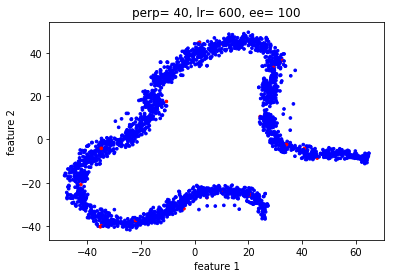

In [5]:
p = 5
lr = 10
ee = 12
x_embedded_tsne = run_trial_tsne(reshaped_final, p, lr, ee)
x = x_embedded_tsne[:,0]
y = x_embedded_tsne[:, 1]
colors = ['b' if i not in weird_points else 'r' for i, _ in enumerate(reshaped_final)]
plt.title("perp= " + str(p) + ", lr= " +str(lr) + ", ee= " + str(ee))
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.scatter(x, y, c=colors, s=7)

In [7]:
for p in [5, 27, 50]:
    for lr in [100, 500, 1000]:
        for ee in [12, 100, 500]:
            print "perp= " + str(p) + ", lr= " +str(lr) + ", ee= " + str(ee)
            x_embedded_tsne = run_trial_tsne(reshaped_final, p, lr, ee)
            x = x_embedded_tsne[:,0]
            y = x_embedded_tsne[:, 1]
            np.save("hehe/perp= " + str(p) + ", lr= " +str(lr) + ", ee= " + str(ee), x_embedded_tsne)
            colors = ['b' if i not in weird_points else 'r' for i, _ in enumerate(reshaped_final)]
            plt.title("perp= " + str(p) + ", lr= " +str(lr) + ", ee= " + str(ee))
            plt.xlabel("feature 1")
            plt.ylabel("feature 2")
            plt.scatter(x, y, c=colors, s=7)
            plt.savefig("hehe/perp= " + str(p) + ", lr= " +str(lr) + ", ee= " + str(ee))

perp= 5, lr= 100, ee= 12
(2500, 2)
perp= 5, lr= 100, ee= 100
(2500, 2)
perp= 5, lr= 100, ee= 500
(2500, 2)
perp= 5, lr= 500, ee= 12
(2500, 2)
perp= 5, lr= 500, ee= 100
(2500, 2)
perp= 5, lr= 500, ee= 500
(2500, 2)
perp= 5, lr= 1000, ee= 12
(2500, 2)
perp= 5, lr= 1000, ee= 100
(2500, 2)
perp= 5, lr= 1000, ee= 500
(2500, 2)
perp= 27, lr= 100, ee= 12
(2500, 2)
perp= 27, lr= 100, ee= 100
(2500, 2)
perp= 27, lr= 100, ee= 500
(2500, 2)
perp= 27, lr= 500, ee= 12
(2500, 2)
perp= 27, lr= 500, ee= 100
(2500, 2)
perp= 27, lr= 500, ee= 500
(2500, 2)
perp= 27, lr= 1000, ee= 12
(2500, 2)
perp= 27, lr= 1000, ee= 100
(2500, 2)
perp= 27, lr= 1000, ee= 500
(2500, 2)
perp= 50, lr= 100, ee= 12
(2500, 2)
perp= 50, lr= 100, ee= 100
(2500, 2)
perp= 50, lr= 100, ee= 500
(2500, 2)
perp= 50, lr= 500, ee= 12
(2500, 2)
perp= 50, lr= 500, ee= 100
(2500, 2)
perp= 50, lr= 500, ee= 500
(2500, 2)
perp= 50, lr= 1000, ee= 12
(2500, 2)
perp= 50, lr= 1000, ee= 100
(2500, 2)
perp= 50, lr= 1000, ee= 500
(2500, 2)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [4]:
x_embedded_tsne = TSNE(n_components=2, perplexity=27, learning_rate=1000, early_exaggeration=100).fit_transform(reshaped_final)
plot_lc(x_embedded_tsne, "trial run")
mpld3.display()

In [17]:
x_embedded_tsne = np.load("hehe/perp= 50, lr= 100, ee= 100.npy")
plot_lc(x_embedded_tsne, "test")
mpld3.display()

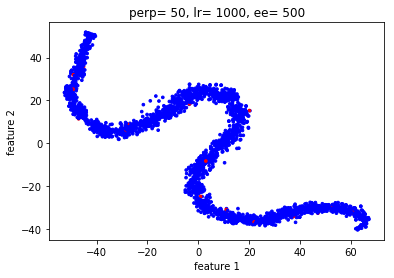

In [20]:
x_embedded_tsne = np.load("hehe/perp= 50, lr= 1000, ee= 500.npy")
x = x_embedded_tsne[:,0]
y = x_embedded_tsne[:, 1]
colors = ['b' if i not in weird_points else 'r' for i, _ in enumerate(reshaped_final)]
plt.title("perp= " + str(p) + ", lr= " +str(lr) + ", ee= " + str(ee))
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.scatter(x, y, c=colors, s=7)


In [23]:
for filename in os.listdir("hehe/"):
    if filename.endswith(".npy"): 
        # print(os.path.join(directory, filename))
        x_embedded_tsne = np.load("hehe/"+filename)
        new_file_name = filename.split(".")[0]
        x = x_embedded_tsne[:,0]
        y = x_embedded_tsne[:, 1]
        colors = ['b' if i not in weird_points else 'r' for i, _ in enumerate(reshaped_final)]
        plt.title("perp= " + str(p) + ", lr= " +str(lr) + ", ee= " + str(ee))
        plt.xlabel("feature 1")
        plt.ylabel("feature 2")
        plt.scatter(x, y, c=colors, s=7)
        plt.savefig("hehe/try_again/"+new_file_name)
        continue
    else:
        continue

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


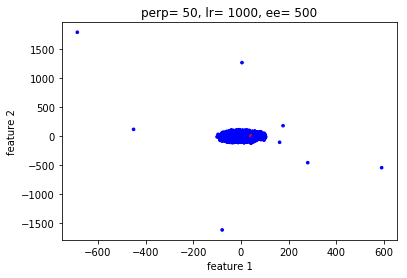

In [27]:
x_embedded_tsne = np.load("hehe/perp= 5, lr= 1000, ee= 500.npy")
new_file_name = filename.split(".")[0]
x = x_embedded_tsne[:,0]
y = x_embedded_tsne[:, 1]
colors = ['b' if i not in weird_points else 'r' for i, _ in enumerate(reshaped_final)]
plt.title("perp= " + str(p) + ", lr= " +str(lr) + ", ee= " + str(ee))
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.scatter(x, y, c=colors, s=7)
plot_lc(x_embedded_tsne, "")
mpld3.display()